**声明：**

hello，小伙伴们~

感谢大家对小鲸鱼的大力支持，目前我在搜集大量经典书籍和资料，其中涉及：

1. **🔥数学统计：**打好理论基础！
2. 🔥**数据分析：**包括数据分析、商业数据分析等
3. 🔥**数据科学：**数据建模、机器学习、AI框架等
4. 🔥**Python/R cookbook**

还有关于数据结构、算法、数据库等等

以及面经、更多的视频资料整理！

总之，这个仓库会一直更新，分享不会停止！

不收费，但只分享给有需要的人，曾经没人帮我指路，但我不希望大家走太多弯路！

**公众号：鲸析**

![](https://tuchuangs.com/imgs/2022/02/e213757d6a0c0007.jpg)

## 项目介绍

为了照顾到每位同学的实际情况，我准备把项目劈成2块，上半部分集中于<font color='red'>数据分析</font>，下半部分集中于<font color='red'>数据科学</font>，从而方便各阶段同学更有效地吸收知识，就地取材，在自己的简历上添砖加瓦！

本笔记（上半部分）旨在深入了解 PorteSeguro 比赛的数据。此外，还提供了一些小tips和tricks来准备数据以备后续的数据建模过程。

---


该notebook由以下主要部分组成：



1. [项目提案&数据梳理](#project_proposal)
    - 1.1 [项目流程梳理](#progress)
    - 1.2 [项目提案](#proposal)
    - 1.3 [数据梳理](#integration)
    
---
2. [数据分析（一）元数据管理&基本数据分析](#data_preprocessing)
    - 2.1 [变量类型](#dtype)
    - 2.2 [元数据](#metadata)
    - 2.3 [元数据描述性分析](#metadata_descriptive)
    
---    
3. [数据分析（二）探索性分析](#eda)
    - 3.1 [不平衡类学习（略讲）](#imbalanced_learning)
    - 3.2 [数据QC](quality_check)
    - 3.3 [EDA](EDA)
    - 3.4 [编码](encoding)
4. [数据分析（三）特征工程](#feat_engineering)
5. [数据分析（四）特征选择](#feat_selection)
6. [数据建模](#model)


你有什么发现么？

<AxesSubplot:>

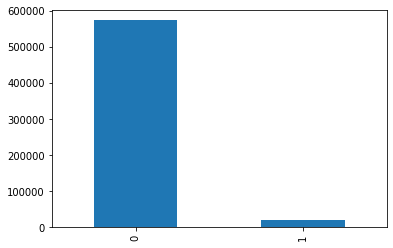

In [15]:
train.target.value_counts().plot(kind = 'bar')

补充：

如果你有余力，建议从下面链接中完成这100道Python Pandas puzzle！来为你下一阶段保驾护航！

链接：https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb

<div class="alert alert-block alert-warning">
<center><b>【第三阶段】项目日志（2022年2月25日）</b></center>
    
   
**第三节阶段核心目的：**基于元数据的梳理过程展开缺失值填充、EDA、数据分析&挖掘。
    
**难度（最高5星）：**⭐⭐⭐
    
**第一阶段周期：** 2022年3月1日 至 2022年3月9日（北京时间）
    
    
**分值**：满分6分，附加题答对8分

Good Luck!
</div>

## 不平衡类学习

根据阶段二的最后一道附加题，大家或许发现端倪了！

大概有97%的训练集数据被归类为0，也就是不索赔，只有3%左右的数据被归类为1，也就是索赔。

那么我们其实所期待的是：

训练集有更多正类，也就是更多的1，更多的发生索赔的数据，这样才能在输入新数据时，更好的预测正类。

不发起索赔: 573518
发起索赔: 21694
比例: 26.44 : 1


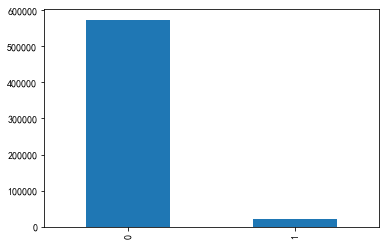

In [17]:
# 这个例子大家直接run就好，不必纠结

import numpy as np
import pandas as pd

train = pd.read_csv('./data/train.csv')

target_count = train.target.value_counts()
print('不发起索赔:', target_count[0])
print('发起索赔:', target_count[1])
print('比例:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar');

那么，我们要基于`26.44:1`的比例去想办法能让正负类平衡一些，该怎么办？

不需要详细了解代码部分，就是用逻辑回归来分类，并查看分类的正确率。

In [18]:
# 直接run
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 移除id和target
features = train.columns[2:]

X = train[features]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1996)

# solver : Algorithm to use in the optimization problem
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
# ‘liblinear’ is limited to one-versus-rest schemes
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.34%


哇！我们正确率已经达到96.34%了，太牛了，项目已经完成了！

那我随便拿出一个特征`ps_calc_02`再去预测一下，看看准确率是多少？

In [19]:
model.fit(X_train[['ps_calc_02']], y_train)
y_pred = model.predict(X_test[['ps_calc_02']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.34%


？还是96.34%，说明这么高的准确度其实是个幻觉，是个假象，在类别极度不平衡的时候，我们就不能单单用`accuracy`来去衡量一个分类模型的好坏了。

所以，我们需要用不平衡学习的知识来处理数据，这里不详细展开，我把处理好的数据放在这里。

<img src="https://pic.imgdb.cn/item/621873142ab3f51d9152bcda.jpg">

具体coding部分，我不在这里详细讲了，会作为补充内容后续发出，给大家说一下思路。

1. 首先，我们遇到了什么问题？

😂 数据类别不平衡，97%的数据对应的标签是【不索赔】，我们不想知道不索赔的人有什么特点，我们关注的是索赔的人有什么样的特征，期待模型去从3%的数据中挖掘有效的特征。

2. 如何解决？

👉 重采样，resampling。

- 从dominant的类别中（这里就是target=0的数据）移除一些样本，这是欠采样（**上图的左上角**）
- 从minority的类别中（target=1）增加一些样本，这是过采样（**上图右上角**）

👉 注意：这些方法不能完美解决imbalance的问题，有利有弊。

这里采用的是欠采样方法，大概维持正负类的比例大概在1:7左右，原来是1:26。

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [21]:
train = pd.read_csv('./data/train.csv')

$$
undersampling~rate = \frac{(1-r)*{minority~size}}{r*majority~size}\\
where ~r = desired~proportion~rate
$$

<div class="alert alert-block alert-success"><b>Step 1 (5分)</b>: 
    
根据指示完成下面的函数`undersampling`。
</div>

```python
def undersampling(df, desired_prop_rate, plot = True):
    # 获取target=0和1的index
    idx_class_0 = 
    idx_class_1 = 
    
    # 获取target=0和1的个数
    count_class_0 = 
    count_class_1 = 
    
    # 根据上面的公式计算undersampling rate
    undersampling_rate = 
    undersampled_majority_size = int(undersampling_rate*count_class_0)
    
    print(f"关于target=0的欠采样比率为:【{undersampling_rate}】")
    print(f"在欠采样之后，target=0的数量为：【{undersampled_majority_size}】")
    
    
    from sklearn.utils import shuffle
    # 用shuffle函数对target=0的所有数据打乱抽样，seed=100,抽样数为刚刚计算的值
    undersampled_idx = shuffle(     #填写代码#     )
    
    # 把undersampling之后的idx和之前的target=1的idx合并，并在train里面根据idx把数据索引出来
    idx_total = list(undersampled_idx)+list(idx_class_1)
    
    df = df.loc[idx_total].reset_index(drop=True)
    
    # 如果plot参数设置为True，画出欠采样之后的target分布柱形图。
    if plot == True:
        import seaborn as sns
        sns.countplot(  #填写代码#  )
        # print(df.target.value_counts()/df.shape[0])
    
    return df
```

In [40]:
def undersampling(df, desired_prop_rate = 0.15, plot = True):
    # 获取target=0和1的index
    idx_class_0 = df[df.target == 0].index
    idx_class_1 = df[df.target == 1].index
    
    # 获取target=0和1的个数
    count_class_0 = len(idx_class_0)
    count_class_1 = len(idx_class_1)
    
    # 根据上面的公式计算undersampling rate
    undersampling_rate = ((1-desired_prop_rate)*count_class_1)/(count_class_0*desired_prop_rate)
    undersampled_majority_size = int(undersampling_rate*count_class_0)
    
    print(f"关于target=0的欠采样比率为:【{undersampling_rate}】")
    print(f"在欠采样之后，target=0的数量为：【{undersampled_majority_size}】")
    
    
    from sklearn.utils import shuffle
    # 用shuffle函数对target=0的所有数据打乱抽样，seed=100,抽样数为刚刚计算的值
    undersampled_idx = shuffle(idx_class_0, random_state=100, n_samples=undersampled_majority_size)
    
    # 把undersampling之后的idx和之前的target=1的idx合并，并在train里面根据idx把数据索引出来
    idx_total = list(undersampled_idx)+list(idx_class_1)
    
    df = df.loc[idx_total].reset_index(drop=True)
    
    # 如果plot参数设置为True，画出欠采样之后的target分布柱形图。
    if plot == True:
        import seaborn as sns
        sns.countplot(x = df.target)
        # print(df.target.value_counts()/df.shape[0])
    
    return df

关于target=0的欠采样比率为:【0.21434840173571998】
在欠采样之后，target=0的数量为：【122932】


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144621,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
144622,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
144623,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
144624,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


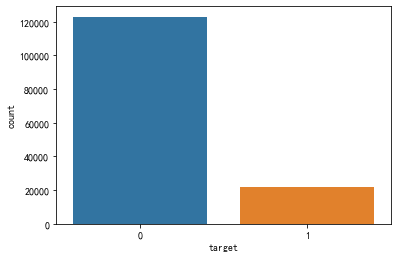

In [41]:
undersampling(df=train)

# 结果应跟下图一样

现在，把刚刚得到的数据存储起来，用df.to_csv()。

In [42]:
train_balanced = undersampling(df = train,plot=False)

关于target=0的欠采样比率为:【0.21434840173571998】
在欠采样之后，target=0的数量为：【122932】


In [43]:
train_balanced.to_csv('./data/train_balanced.csv')

In [44]:
train_balanced = pd.read_csv('./data/train_balanced.csv',index_col=0)

In [45]:
train_balanced

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,744529,0,2,1,9,1,0,0,0,1,...,5,1,2,8,0,0,1,0,0,0
1,673907,0,1,1,2,1,0,0,1,0,...,6,4,4,9,1,1,1,1,1,0
2,730796,0,7,1,6,0,4,0,0,0,...,3,1,3,7,0,1,1,0,0,0
3,306142,0,1,1,3,0,0,1,0,0,...,5,0,2,9,0,0,1,0,0,0
4,1102701,0,6,2,7,1,0,0,1,0,...,6,0,2,9,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144621,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
144622,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
144623,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
144624,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


### 数据QC

上一阶段，我们了解并熟悉了元数据处理，这个概念帮助我们有效有序地梳理维度较高的数据，通过变量的性质和特点，我们可以快速找到对于的变量，并对其展开分析，所以，我们这里将继续基于meta，对数据进行分析！

<font color=red>此时，我们将使用`train_balanced`这个数据！</font>

<div class="alert alert-block alert-success"><b>Step 2 (3分)</b>: 
    
请基于`metadata`的`缺失值数量`这一列，取出所有变量中缺失值最多的前三名（争取用1行代码！）（3分）
    
提示：
- sorted
- zip
- lambda
    
    

</div>

In [46]:
metadata = pd.read_csv('./data/metadata.csv',index_col=0)

In [47]:
metadata

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量
变量名称,,,,,,
id,序列号（不属于特征）,nominal,int64,False,不统计,0(0.0%)
target,目标标签（是否发起索赔）,binary,int64,True,2,0(0.0%)
ps_ind_01,特征,ordinal,int64,True,8,0(0.0%)
ps_ind_02_cat,特征,nominal,int64,True,4,80(0.06%)
ps_ind_03,特征,ordinal,int64,True,12,0(0.0%)
ps_ind_04_cat,特征,nominal,int64,True,2,48(0.03%)
ps_ind_05_cat,特征,nominal,int64,True,7,1604(1.11%)
ps_ind_06_bin,特征,binary,int64,True,2,0(0.0%)
ps_ind_07_bin,特征,binary,int64,True,2,0(0.0%)


In [29]:
# 问题1：完善下列代码

In [48]:
train_balanced_update = train_balanced.copy()

In [34]:
# 找到缺失值的前三名,以及其变量类型和缺失值数量

# 答案另起一行

# 首先找出所有的missing columns，从大到小排序取前三。

missing_summary = 
missing_cols_top3 = missing_summary.iloc[:3,0].tolist()
missing_summary # 应如下！

,变量名,变量类型,缺失值数量
0,ps_car_03_cat,nominal,98459(68.08%)
1,ps_car_05_cat,nominal,63882(44.17%)
2,ps_reg_03,interval,25226(17.44%)
3,ps_car_14,interval,10569(7.31%)
4,ps_car_07_cat,nominal,3149(2.18%)
5,ps_ind_05_cat,nominal,1604(1.11%)
6,ps_car_09_cat,nominal,165(0.11%)
7,ps_ind_02_cat,nominal,80(0.06%)
8,ps_car_01_cat,nominal,53(0.04%)
9,ps_ind_04_cat,nominal,48(0.03%)


In [49]:
#群主答案
missing_summary = pd.DataFrame(sorted(zip(metadata.index,metadata['变量类型'],metadata['缺失值数量']),key = lambda x: int(x[2].split('(')[0]),reverse=True),columns = ['变量名','变量类型','缺失值数量']).iloc[:11,:]
missing_cols_top3 = missing_summary.iloc[:3,0].tolist()
missing_summary 

,变量名,变量类型,缺失值数量
0,ps_car_03_cat,nominal,98459(68.08%)
1,ps_car_05_cat,nominal,63882(44.17%)
2,ps_reg_03,interval,25226(17.44%)
3,ps_car_14,interval,10569(7.31%)
4,ps_car_07_cat,nominal,3149(2.18%)
5,ps_ind_05_cat,nominal,1604(1.11%)
6,ps_car_09_cat,nominal,165(0.11%)
7,ps_ind_02_cat,nominal,80(0.06%)
8,ps_car_01_cat,nominal,53(0.04%)
9,ps_ind_04_cat,nominal,48(0.03%)


In [50]:
missing_cols_top3  # 你的答案应如下！

['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03']

In [51]:
missing_cols = missing_summary.iloc[:,0]

In [52]:
missing_cols # 所有含有missing value的cols

0     ps_car_03_cat
1     ps_car_05_cat
2         ps_reg_03
3         ps_car_14
4     ps_car_07_cat
5     ps_ind_05_cat
6     ps_car_09_cat
7     ps_ind_02_cat
8     ps_car_01_cat
9     ps_ind_04_cat
10        ps_car_11
Name: 变量名, dtype: object

可以看到，前两名都是nominal的，并且缺失值都超过总量的40%，所以我们先舍弃这两个变量。

在metadata中把把对应的`是否保留`这一列更改。

In [53]:
cols_to_drop=['ps_car_03_cat','ps_car_05_cat']

In [54]:
metadata.loc[cols_to_drop,'是否保留'] = False # 更改metadata

第三、四名是interval变量，是连续型的，分别代表了region（地区型）和car（车辆型）的信息。

In [55]:
train_balanced[['ps_reg_03','ps_car_14']].replace(-1,np.nan).describe()

# 连续型变量要replace -1 再去做描述性统计。

,ps_reg_03,ps_car_14
count,119400.000000,134057.000000
mean,0.900321,0.374999
std,0.348303,0.046183
min,0.061237,0.109545
25%,0.637377,0.349857
50%,0.808161,0.374433
75%,1.097440,0.398497
max,4.037945,0.631664


<div class="alert alert-block alert-success"><b>Step 2 (3分)</b>: 
    
对于这两列，请阐述你关于缺失值处理的想法，并且用代码validate，言之有理即可。
    
</div>

提示：
![](https://s6.jpg.cm/2022/02/26/LgNC44.png)

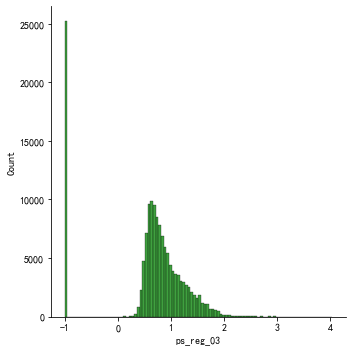

In [72]:
# 你的答案
sns.displot(train_balanced['ps_reg_03'], color= 'g', bins= 100)

<AxesSubplot:xlabel='ps_reg_03', ylabel='Count'>

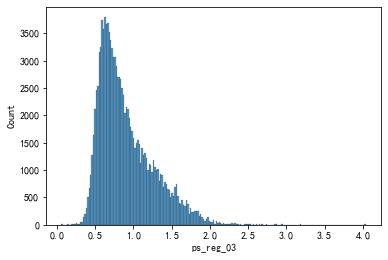

In [69]:
sns.histplot(train_balanced['ps_reg_03'].replace(-1,np.nan))

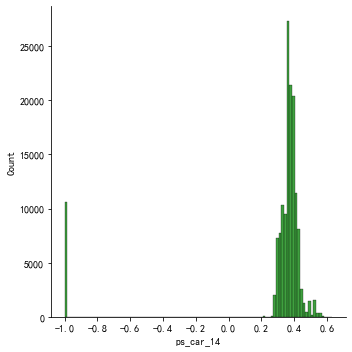

In [76]:
sns.displot(train_balanced['ps_car_14'], color= 'g', bins= 100)

<AxesSubplot:xlabel='ps_car_14', ylabel='Count'>

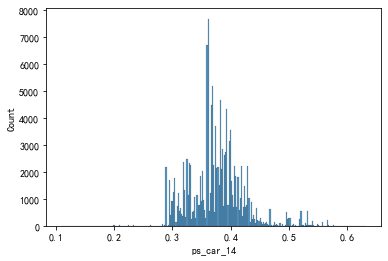

In [74]:
sns.histplot(train_balanced['ps_car_14'].replace(-1,np.nan))

<AxesSubplot:>

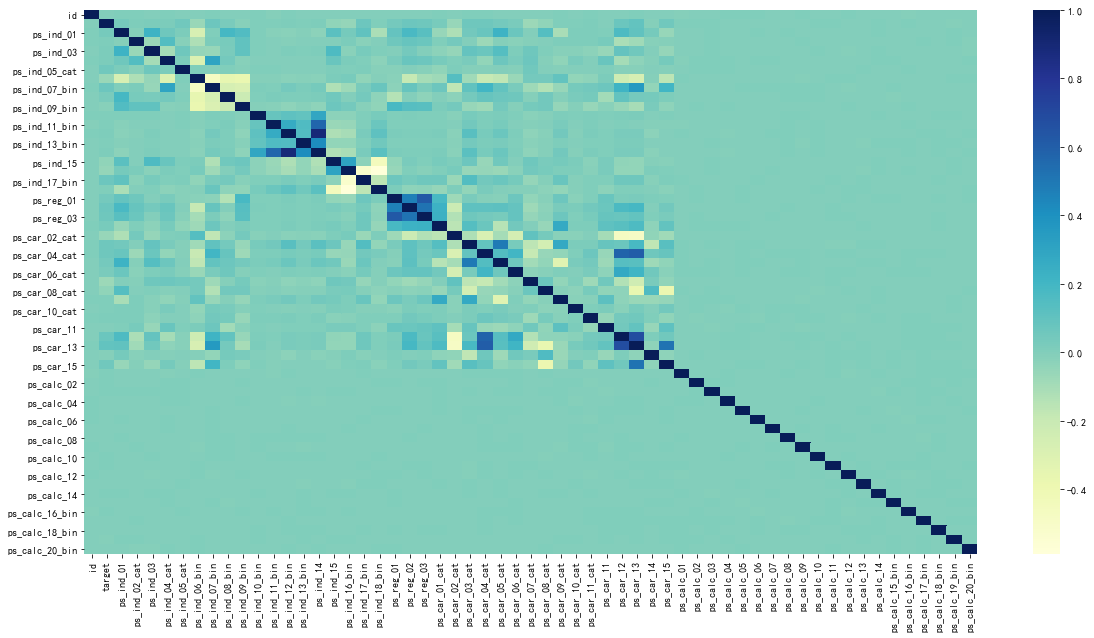

In [87]:
corrmat = train_balanced.corr()
f, ax = plt.subplots(figsize= (20,10))
sns.heatmap(corrmat, cmap="YlGnBu")

ps_reg_03 is positively skewed to the right while ps_car_14 is negatively skewed to the left. However, based on the heatmap, the relationship between each other are not strong enough.

抛开前四个，剩下变量所含的缺失值虽然不多，但是我们也要处理。

In [56]:
missing_cat_cols = missing_cols[4:].tolist()  # 前四个已经处理掉了

In [57]:
missing_cat_cols  # 剩下七个 都是categorical的

['ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_11']

<div class="alert alert-block alert-success"><b>Step 3 (4分)</b>: 
    
对于上面output中的这些离散特征，请阐述你关于缺失值处理的想法，并且用代码validate，言之有理即可。
    
</div>

提示：

填补一下代码的空缺！

- 子画布大小为[10,5]
- 根据target进行分类
- 设置横纵轴标签大小为10


```python
for col in missing_cat_cols:
    
    # 简历画布
    plt.figure()
    # 设置子画布
    fig, ax = plt.subplots(figsize=(10,5))
    
    # countplot
    sns.countplot(  #填写代码#   )
    
    # 设置横轴纵轴标签以及标题
    plt.ylabel('数量', fontsize=14)
    plt.xlabel(col, fontsize=14)
    plt.title(f"变量【{col}】根据target的类别分布",fontsize = 16)
    # 设置横纵轴标签大小为10
        代码。。。
```

<Figure size 432x288 with 0 Axes>

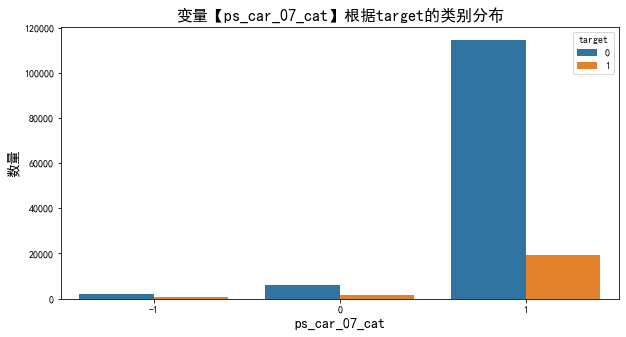

<Figure size 432x288 with 0 Axes>

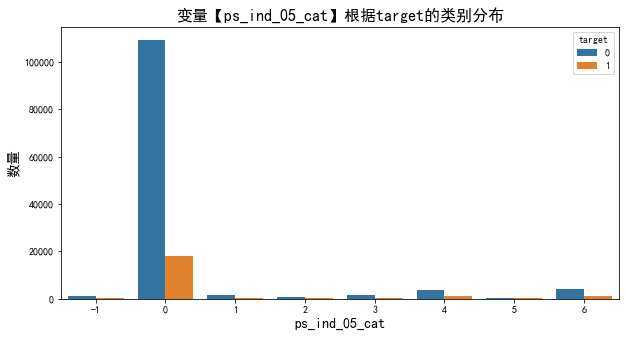

<Figure size 432x288 with 0 Axes>

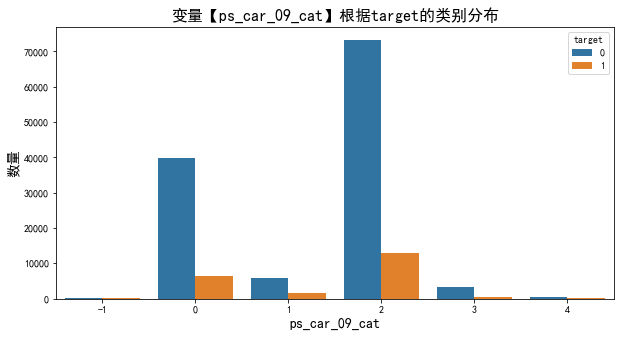

<Figure size 432x288 with 0 Axes>

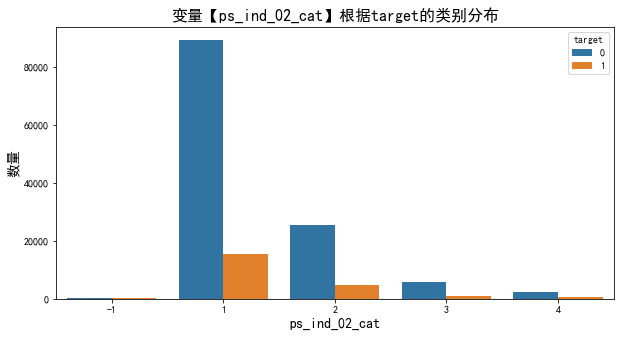

<Figure size 432x288 with 0 Axes>

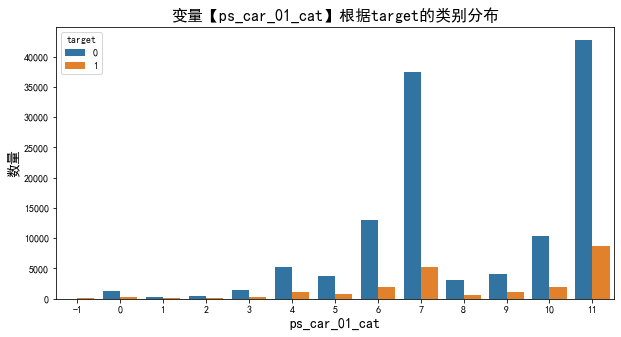

<Figure size 432x288 with 0 Axes>

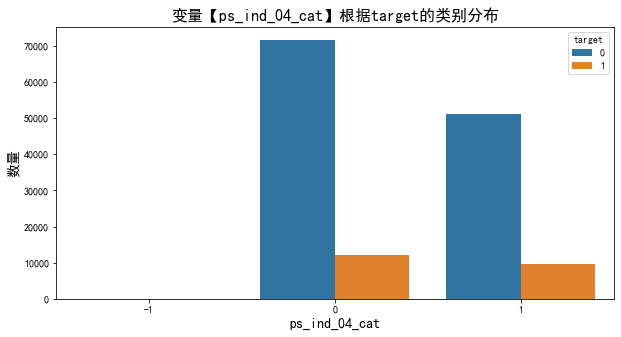

<Figure size 432x288 with 0 Axes>

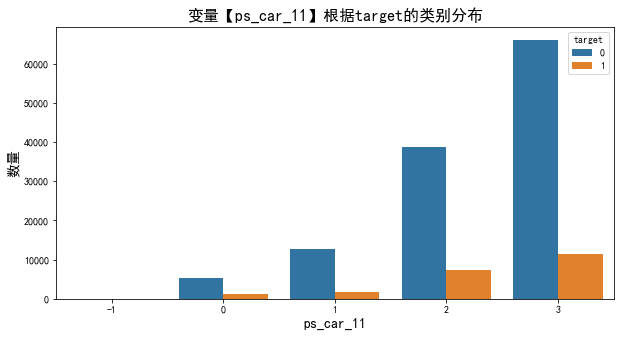

In [59]:
for col in missing_cat_cols:
    
    # 简历画布
    plt.figure()
    # 设置子画布
    fig, ax = plt.subplots(figsize=(10,5))
    
    # countplot
    sns.countplot(x = col,hue = 'target', data = train_balanced)
    
    # 设置横轴纵轴标签以及标题
    plt.ylabel('数量', fontsize=14)
    plt.xlabel(col, fontsize=14)
    plt.title(f"变量【{col}】根据target的类别分布",fontsize = 16)
    # 设置横纵轴标签大小为10
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

现在，我们来进行缺失值的填充，使用sklearn的Imputer，这里对train_balanced_update进行填充（copy），保留原train_balanced。

### 缺失值填充

In [88]:
from sklearn.impute import SimpleImputer # 这里使用SimpleImputer，参考：https://zhuanlan.zhihu.com/p/83173703

In [89]:
# 排名前2的变量我们drop掉
cols_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']

排名第三第四的变量，我们分别应该如何填充？

不同的strategy形成不同的填充模式，

- If "<font color=red>mean</font>", then replace missing values using the mean along each column. Can only be used with numeric data.
- If "<font color=red>median</font>", then replace missing values using the median along
  each column. Can only be used with numeric data.
- If "<font color=red>most_frequent</font>", then replace missing using the most frequent
  value along each column. Can be used with strings or numeric data.
  If there is more than one such value, only the smallest is returned.
- If "<font color=red>constant</font>", then replace missing values with fill_value. Can be
  used with strings or numeric data.

shift+tab 查看函数用法以及参数。

In [90]:
mean_imputer = SimpleImputer(missing_values = -1, strategy='mean',add_indicator=True)
mode_imputer = SimpleImputer(missing_values = -1, strategy='most_frequent',add_indicator=True)

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 思考：

- add_indicator的作用
- strategy不同造成什么影响
</div>

In [91]:
# 众数填充 why?
train_balanced_update['ps_reg_03']=[x[0] for x in mode_imputer.fit_transform(train_balanced_update[['ps_reg_03']]).tolist()]

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 思考：

尝试一下完善下面代码
</div>

In [92]:
# 均值填充 why?
train_balanced_update['ps_car_14']=[x[0] for x in mean_imputer.fit_transform(train_balanced_update[['ps_car_14']]).tolist()]

可以看到，剩下的nominal和ordinal变量都属于离散变量，所以我们需要用众数填充，其某一类的占比极大（dominant），所以我们用mode_imputer。

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 思考：

fit_transform、fit有什么区别？
</div>

In [93]:
imp = mode_imputer.fit_transform(train_balanced_update[missing_cat_cols])

In [94]:
train_balanced_update[missing_cat_cols]=pd.DataFrame(imp).iloc[:,:len(missing_cat_cols)]

In [95]:
train_balanced_update[missing_cat_cols] = train_balanced_update[missing_cat_cols].astype('int64')# 填充之后dtype会改变，记得改回来

此时，我们填充缺失值后的数据应该不存在缺失值了，但是如果要更新metadata的话，好像有点麻烦，别着急，继续往下走。

### EDA(exploratory data analysis)

下面，我们正式开始对数据进行探索式分析，还是基于metadata，对不同变量类型展开分析。

<div class="alert alert-block alert-success"><b>Step 3 (5分)</b>: 
    
1. 这两段代码的结果有什么区别？（1分）
2. 解锁下面代码，研究输出代表什么意思，纵坐标和横坐标的关系是什么？然后在图上加上title描述这个图的含义，纵轴标签大小设置为20（2分）
3. 我们应该如何处理？对离散型变量作出什么改变？（2分）【提示：inverse_transform】
    
</div>

<Figure size 432x288 with 0 Axes>

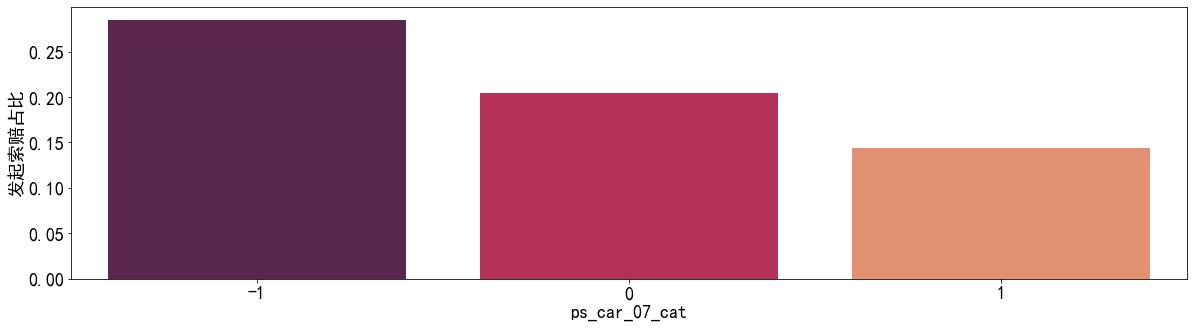

<Figure size 432x288 with 0 Axes>

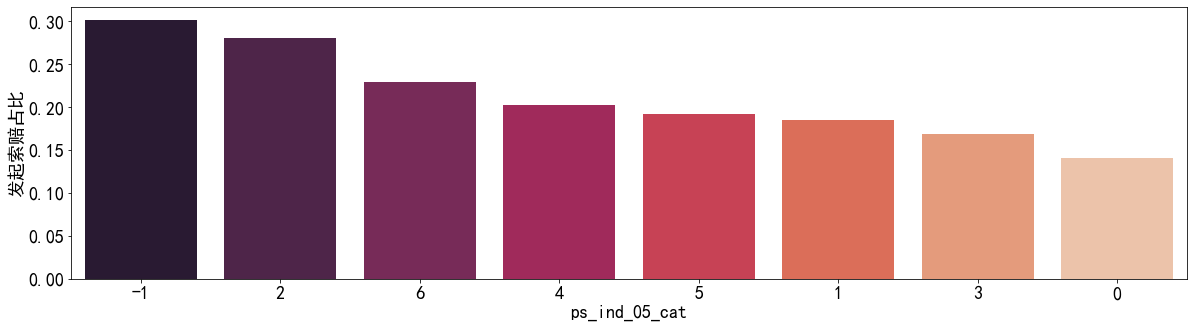

<Figure size 432x288 with 0 Axes>

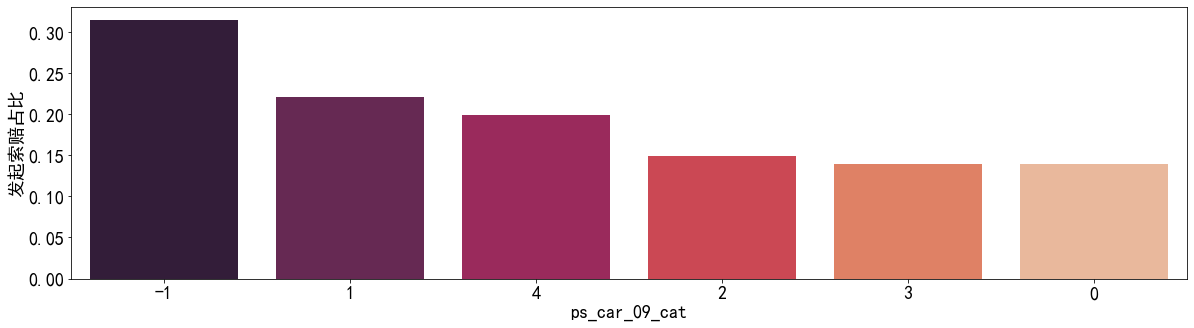

<Figure size 432x288 with 0 Axes>

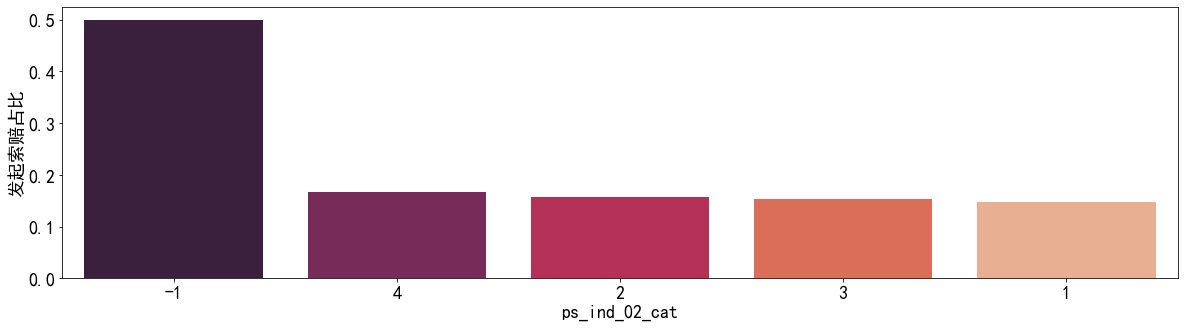

<Figure size 432x288 with 0 Axes>

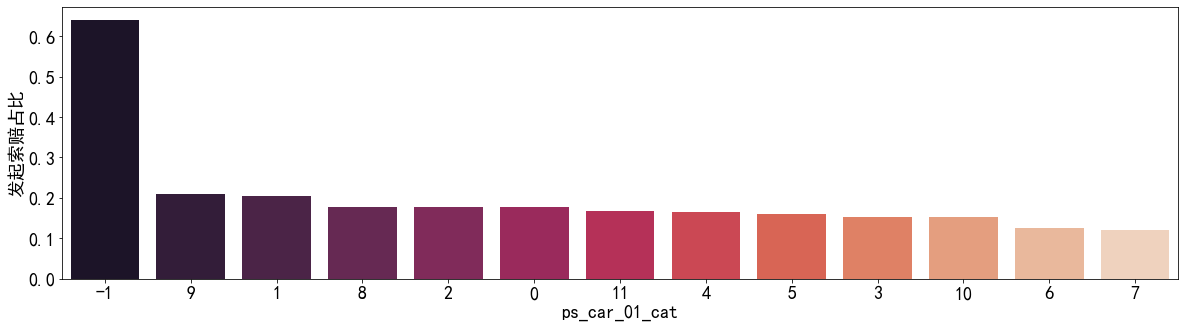

<Figure size 432x288 with 0 Axes>

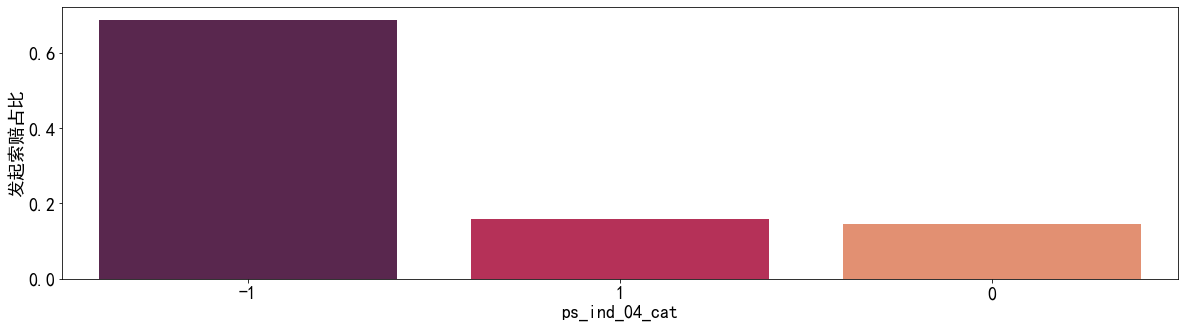

<Figure size 432x288 with 0 Axes>

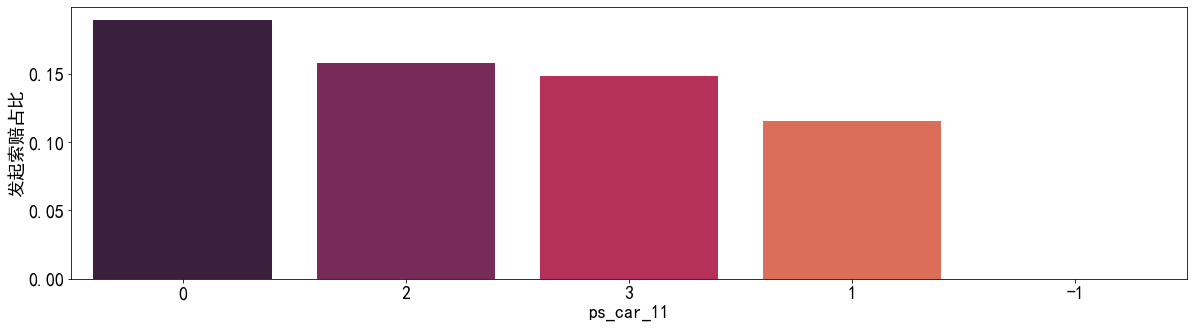

In [97]:
for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,5))

    cat_perc = train_balanced[[col, 'target']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette='rocket')
    # title
    
    plt.xlabel(col, fontsize=18)
    plt.ylabel('发起索赔占比', fontsize=18)
    # 纵轴标签大小
    plt.tick_params(axis='both', which='major', labelsize=18)
    
    
# 答案的输出应如下！

<Figure size 432x288 with 0 Axes>

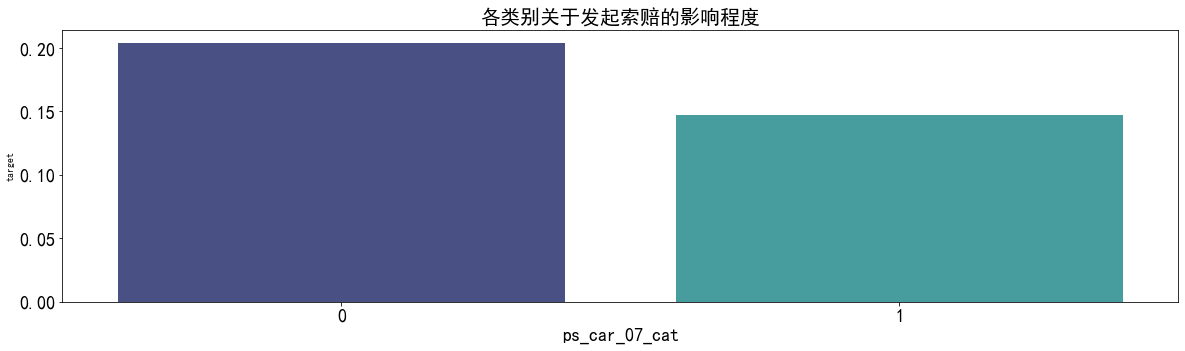

<Figure size 432x288 with 0 Axes>

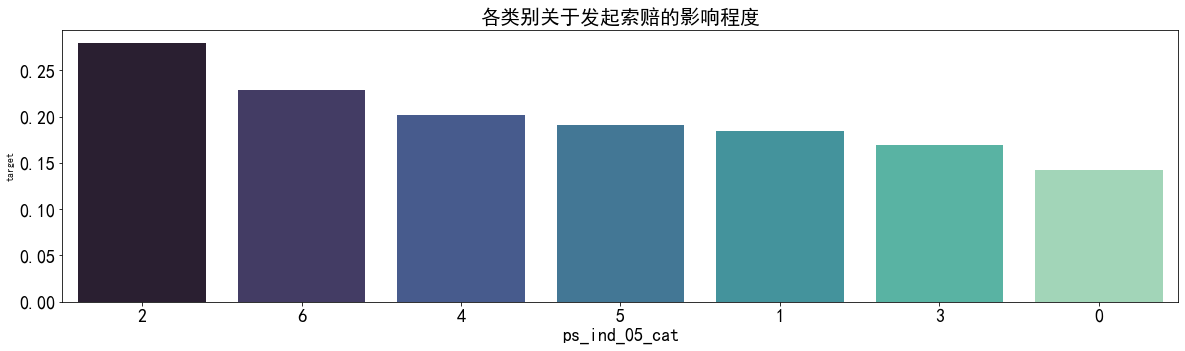

<Figure size 432x288 with 0 Axes>

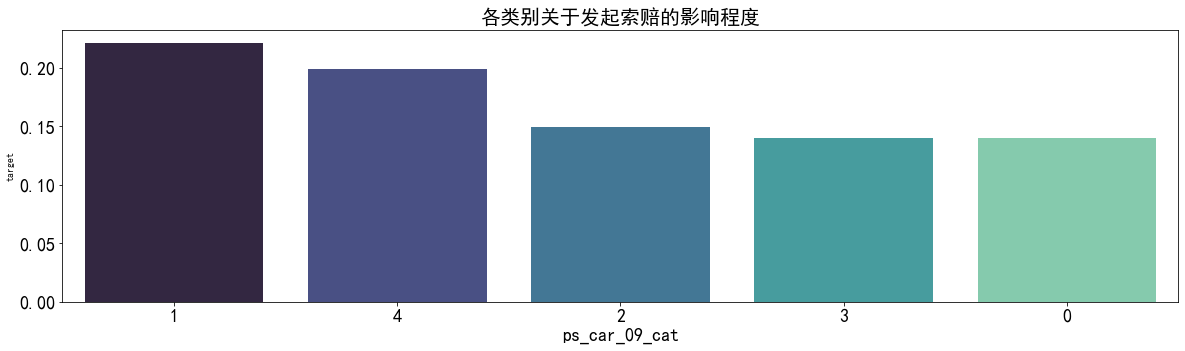

<Figure size 432x288 with 0 Axes>

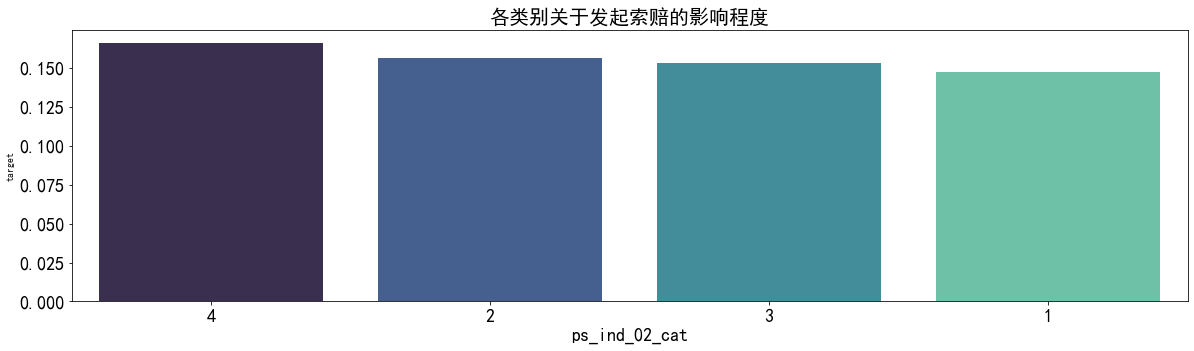

<Figure size 432x288 with 0 Axes>

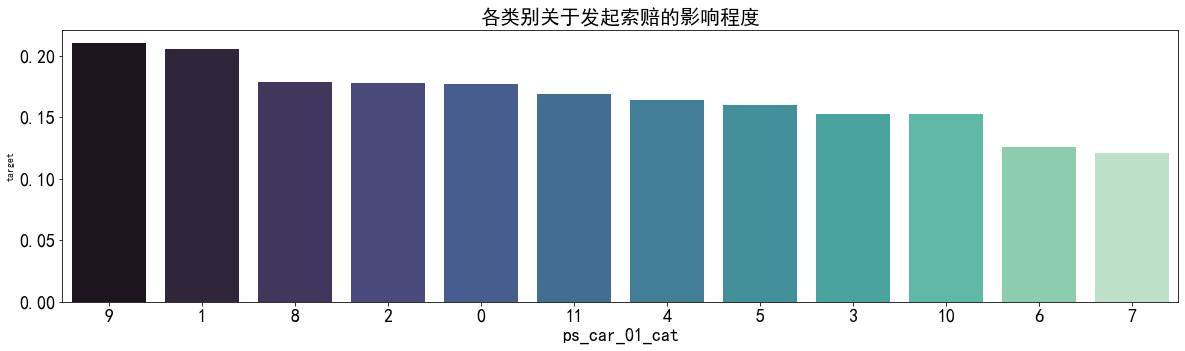

<Figure size 432x288 with 0 Axes>

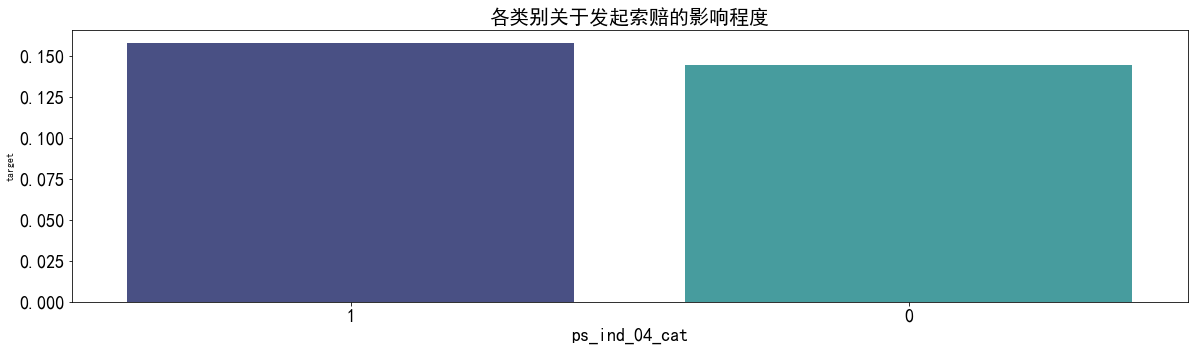

<Figure size 432x288 with 0 Axes>

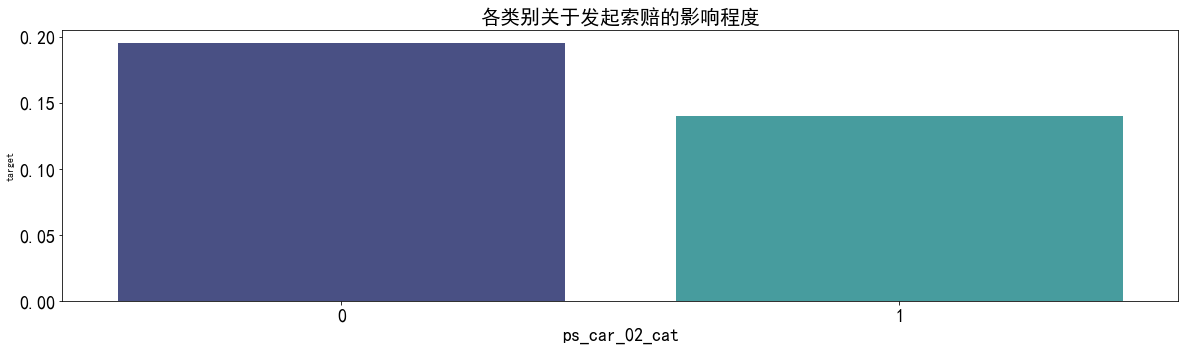

In [52]:
for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,5))

    cat_perc = train_balanced_update[[col, 'target']].groupby([col],as_index=False).mean()  
    # train_balanced换成了train_balanced_update(去除缺失值之后)
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    sns.barplot(ax=ax, x=col, y='target', data=cat_perc, order=cat_perc[col],palette='mako')

    plt.xlabel(col, fontsize=18)
    #plt.ylabel('发起索赔占比', fontsize=18)


In [98]:
missing_cat_cols  # 那么这7个有缺失值的变量，该如何处理？

['ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_11']

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 提示：

imputer + inverse_transform
</div>

In [99]:
train_balanced_update[missing_cat_cols[:6]]=pd.DataFrame(mode_imputer.inverse_transform(imp)).iloc[:,:6].astype('int64')

这个时候，我们需要对metadata更新，因为当这些离散型变量的类别为-1时，也值得我们研究，尽管我们不知道为什么是缺失的，但是这几个变量下，客户的缺失值反而大大对target=1有重要的影响。

那么metadata的唯一值需要我们更新。

不过请大家注意这一列：`ps_car_11_cat`

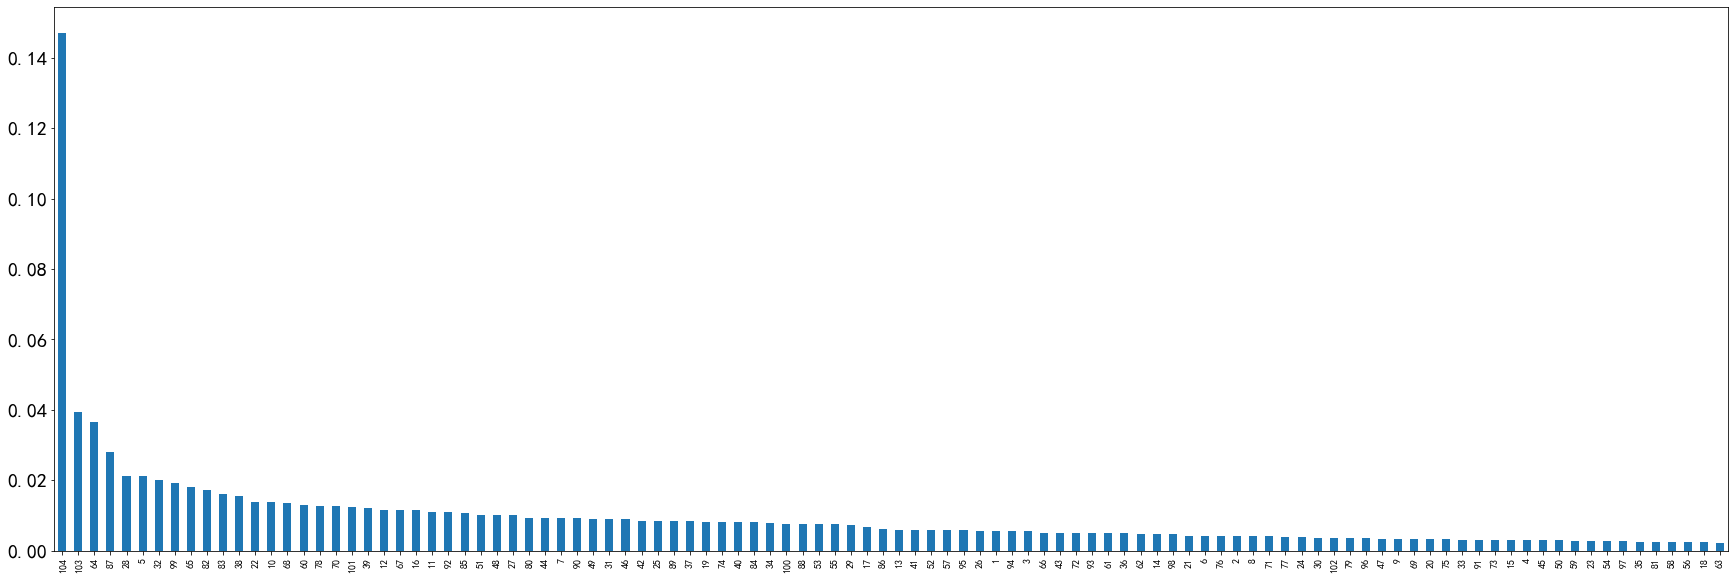

In [100]:
(train_balanced_update.ps_car_11_cat.value_counts()/train_balanced_update.shape[0]).plot(kind='bar',figsize = [30,10])
plt.tick_params(axis='y', which='major', labelsize=20)

这一列是nominal的，离散型变量，并且dominant的一类：104（虽然我不懂什么意思），占据整个类别的15%左右，所以我不能认为这一类完全压过了其他类，从而可以忽视其他类别的研究，而且这一列有104个唯一值数量，并且不存在顺序关系。

那么这个时候对这种唯一值过多的列如何编码，就成问题了！

看下图👇👇👇

来自我的小红书作品：http://xhslink.com/AYivVf 【请移步到我的作品中查看细节哦！】

总结：

- 当变量类型是`ordinal`，我们可以用`OrdinalEncoder`或者`LabelEncoder`去编码。
- 当变量类型是`nominal`，我们可以用`OneHotEncoder`去编码。

但是当这一列的唯一值过多，一列就变成了104列，再加上其他经过编码的列，整个数据的维度就会爆炸，从原来的60维上升到几百维这样，极大影响了后续建模的过程。

### 编码 encoding

1. label encoding
其实本身数据已经做了label encoding了，类别型数据已经用整数来去替换了。


2. onehot encoding(dummy encoding)

比如下图，本来有3类数据，那么我就把一列扩充为三列，然后遍历每一行，如果该行关于这一列的值，原来是`private`,那么在新的3列之中，只有`WorkClassPrivate`这一列设置为1，其他2列为0，以此类推。


[![bQBUqH.png](https://s4.ax1x.com/2022/03/01/bQBUqH.png)](https://imgtu.com/i/bQBUqH)


今天简单说一下 target encoding 也叫 mean encoding。

就是把类别替换成target关于这一类的均值。

[![bQDkeH.png](https://s4.ax1x.com/2022/03/01/bQDkeH.png)](https://imgtu.com/i/bQDkeH)

先把每一类groupby，然后计算每一组的mean，然后替换。

<div class="alert alert-block alert-success"><b>Step 4 (4分)</b>: 
    
分析整理一下这三个编码方法的优缺点，还有别的编码方法么？
    
</div>

In [ ]:
# 你的答案
Label Encoding
- 优点：可以根据字母循序把类别转换成0，1，2，3，4
- 缺点：由于把类别转换成0，1，2，3，会导致模型误会类别的关系。比如印度是0，日本是1，中国是2， 这样的转换会让模型以为中国大过日本，日本大过印度。导致预测不准确

Onehot Encoding
- 优点：会建立而外的列来显示类别，并吧类比转换成binary format，可以很好地解决label encoding所带来的问题
- 缺点：会导致模型利用剩下的数据很容易的预测到答案

Target Encoding
- 优点：会把类比直接转换成平均值
- 缺点：target encoding是依靠着target的分布量，所以需要而外的注意已经validate，因为他有可能带来overfitting， 只能使用在特定的数据
- 可以很好的减少数据泄露， 因为已经把类别换成平均值，已经不知道原来的数据代表着什么

别的编码方法
- binary encoding
    - 不会而外建立新的列
    -适合用于有很多categorical的数据
    -处理速度非常快
    -把类别转换成binary format


给大家看一下target encoding的函数。

In [104]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # 集散这一列关于target的group mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # 平滑
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # 计算所有target的mean
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    # 如果某一类别的值的个数特别多，比如104这一类就有21255行，那么我们就要削减其关于target的mean的权值。
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # 分别对train和test计算mean
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

<div class="alert alert-block alert-success"><b>Step 5 (4分)</b>: 
    
理解以上的代码，并阐述target encoding的优缺点（2分）以及如何减少数据泄露的（2分）？
    
</div>

In [103]:
test = pd.read_csv('./data/test.csv')

In [105]:
train_encoded, test_encoded = target_encode(train_balanced_update["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train_balanced_update.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [106]:
train_balanced_update["ps_car_11_cat_tar_enc"] = train_encoded.astype('float64')
test['ps_car_11_cat_tar_enc'] = test_encoded.astype('float64')

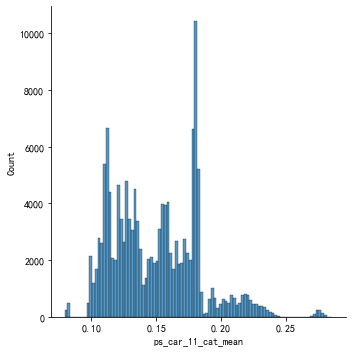

In [107]:
sns.displot(train_encoded)

In [108]:
cols_to_drop.append('ps_car_11_cat')

In [109]:
cols_to_drop

['ps_car_03_cat', 'ps_car_05_cat', 'ps_car_11_cat']

<div class="alert alert-block alert-success"><b>Step 5 (2分)</b>: 
    
尝试理解代码，能改良就改良（2分），meta函数是否能帮助你在日常学习、工作、或者处理其他表格型数据时产生作用呢？
    
https://www.kaggle.com/datasets
    
在上面链接中，下载两个表格型数据，尝试能否快速提取元数据。
    
</div>

In [66]:
def meta(raw_data, processed_data=None, cols_to_drop = [], keep_missing = True):
    """
    raw_data: raw data obtained
    data_processed: data after preprocessing
    cols_to_drop: excluded cols that contain too many missing values or we dont use
    keep_missing: True if we find we dont need to eliminate missing values after imputation
    """
    data = []
    if processed_data is not None:
        df = processed_data.copy()
    else:
        df = raw_data
    for col in df.columns:
        # Defining the role
        if col == 'target':
            role = '目标标签（是否发起索赔）'
        elif col == 'id':
            role = '序列号（不属于特征）'
        else:
            role = '特征'

        # 加入ratio变量
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col[-3:] or col == 'id':
            level = 'nominal'
        elif df[col].dtype == 'float64' and df[col].replace(-1,np.nan).max()-df[col].replace(-1,np.nan).min() > 1:
            level = 'interval'
        elif df[col].dtype == 'float64' and df[col].replace(-1,np.nan).max()-df[col].replace(-1,np.nan).min() <= 1:
            level = 'ratio'
        elif df[col].dtype == 'int64':
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id' or col in cols_to_drop:
            keep = False

        # Defining the data type 
        dtype = df[col].dtype
        
        # 定义唯⼀值数量
# 定义唯⼀值数量
        if col == 'id' or df[col].dtype == 'float64':
            uniq = '不统计'
        else:
            if keep_missing == True:
                uniq = train[col].nunique()
            else:
                uniq = train[col].replace({-1:np.nan}).nunique()

        # 定义缺失值
        n_missing = sum(df[col] == -1)
        missing = f'{n_missing}({round(n_missing*100/len(train),2)}%)'
    

        col_dict = {
            '变量名称': col,
            '数据角色': role,
            '变量类型': level,
            '数据类型': dtype,
            '是否保留': keep,
            '唯一值数量': uniq,
            '缺失值数量': missing
        }
        data.append(col_dict)
    
    meta = pd.DataFrame(data, columns=list(col_dict.keys()))
    meta.set_index('变量名称', inplace=True)
    
    missing_cols = [col for col in raw_data.columns if raw_data[col].min() == -1]
    meta['缺失值处理'] = ['无缺失值' if col not in missing_cols
        else '已去除' if col in cols_to_drop
        else '保留缺失值' if meta.loc[col,'缺失值数量'][0] != '0' 
        else '已填充' for col in meta.index]

    
    return meta

In [67]:
final_meta = meta(raw_data = train, 
                  processed_data = train_balanced_update, 
                  cols_to_drop = cols_to_drop, 
                  keep_missing = True)
#final_meta

,数据角色,变量类型,数据类型,是否保留,唯一值数量,缺失值数量,缺失值处理
变量名称,,,,,,,
id,序列号（不属于特征）,nominal,int64,False,不统计,0(0.0%),无缺失值
target,目标标签（是否发起索赔）,binary,int64,True,2,0(0.0%),无缺失值
ps_ind_01,特征,ordinal,int64,True,8,0(0.0%),无缺失值
ps_ind_02_cat,特征,nominal,int64,True,5,80(0.01%),保留缺失值
ps_ind_03,特征,ordinal,int64,True,12,0(0.0%),无缺失值
ps_ind_04_cat,特征,nominal,int64,True,3,48(0.01%),保留缺失值
ps_ind_05_cat,特征,nominal,int64,True,8,1604(0.27%),保留缺失值
ps_ind_06_bin,特征,binary,int64,True,2,0(0.0%),无缺失值
ps_ind_07_bin,特征,binary,int64,True,2,0(0.0%),无缺失值


In [68]:
final_meta.to_csv('./data/final_meta.csv')

## 总结

阶段三主要带大家了解：

1. 不平衡类别学习（初级）
2. 如何用SimpleImputer填充缺失值
3. 缺失值一定要填充么？
4. EDA
5. 类别型变量如何编码 encoding？

[![H65i3d.gif](https://s4.ax1x.com/2022/02/14/H65i3d.gif)](https://imgtu.com/i/H65i3d)

<img src="https://s4.ax1x.com/2022/02/14/H65vxs.jpg" alt="image-20220214212808413" style="zoom:25%;" />